# Seaborn [cheatsheet](https://www.kaggle.com/code/albertovidalrod/seaborn-cheat-sheet-a-guide-to-most-graphs/) by [ALBERTO VIDAL](https://www.kaggle.com/albertovidalrod)

My goal for this notebook is to present a more complete cheat sheet than other notebooks have done in the past. To do so, I got inspired by an article from [Python and R tips](https://cmdlinetips.com/2020/09/seaborn-version-0-11-0-is-here-with-displot-histplot-and-ecdfplot/), which includes the following graph:

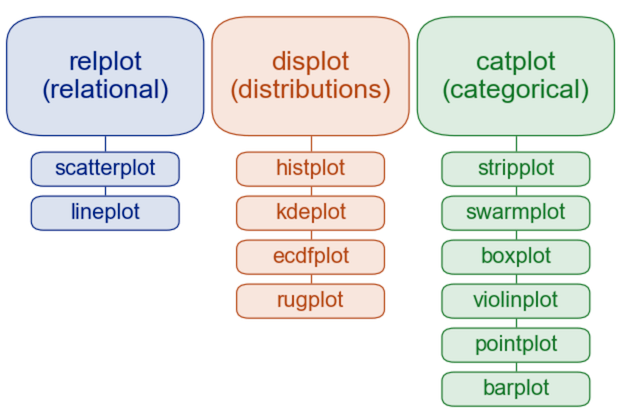


Image Credit: [Python and R tips](https://cmdlinetips.com/2020/09/seaborn-version-0-11-0-is-here-with-displot-histplot-and-ecdfplot/)

In this notebook, I include the code the create the graphs described in the picture, sometimes using more than one function.

Other than this, I would like to share some of the resources I use whenever I need to represent my data. They are a great starting point.
* [Chart Suggestions - A thought starter, by A.Abela](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)
* [Visual Vocabulary - Designing with data, by The Financial Times](http://ft-interactive.github.io/visual-vocabulary/)

<a id='table_contents'></a>

# Table of contents

1. [Packages and Data](#packages_data)
<br>

2. [Default parameters](#default_parameters)
<br>
3. [Relational plot](#relplot)<br>
    3.1 [Scatter plot](#scatterplot)<br>
    3.1.1 [Scatter plot - Categorical data](#scatterplot_categorical)<br>
    3.1.2 [Regression plot - lmplot() vs regplot()](#regression)<br>
    3.2 [Bubble plot](#bubbleplot)<br>
    3.2.1 [Bubble plot - Categorical data](#bubbleplot_categorical)<br>
    3.3 [Line plot](#lineplot)<br>
    3.3.1 [Line plot - Categorical data](#lineplot_categorical)
    <br>
    
4.	[Distribution plots](#displot)<br>
    4.1 [Histogram](#histogramplot)<br>
    4.2 [Density plots (kde plots)](#kdeplot)<br>
    4.2.1 [Histogram and kde function](#hist-kdeplot)<br>
    4.3 [Empirical distribution plots (ecdf plots)](#ecdfplot)<br>
    4.4 [Rug plots](#rugplot)<br>
    4.4.1 [Rug plots - both axes](#rugplot-axes)<br>
    4.5 [Bivariate plots](#2Dplot)<br>
    <br>

5.	[Categorical plots](#categoricalplot)<br>
    5.1 [Strip plots](#stripplot)<br>
    5.2 [Swarm plots](#swarmplot)<br>
    5.3 [Box plots](#boxplot)<br>
    5.4 [Violin plots](#violinplot)<br>
    5.5 [Point plots](#pointplot)<br>
    5.6 [Bar plots](#barplot)<br>
    <br>
    
6.	[Other plots](#otherplot)<br>
    5.1 [Pair plot](#pairplot)<br>
    5.2 [Heatmap](#heatmap)<br>

<a id='packages_data'></a>

# 1. Import Data and Packages

In [1]:
import matplotlib  # Used to set default paremeters
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams  # Used to set default paremeters

%matplotlib inline

In [2]:
cars_df = sns.load_dataset("mpg").dropna()
flights_df = sns.load_dataset("flights").dropna()

<a id='default_parameters'></a>

# 2. Default paremeters

We can set default parameters for the labels and titles. This way, we'll make sure the font and fontsize are adequate for all the figures. In case we update the parameters, all the pictures will be updated accordingly once they are re-run

In [3]:
# Set Default Fonts
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Set Default font sizes
small_size = 12
medium_size = 14
large_size = 16

# # Change the font size for individual elements
matplotlib.rc("font", size=small_size)  # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)  # legend fontsize
matplotlib.rc("axes", titlesize=large_size)  # title fontsize

# Background style for the plots
# sns.set_style(style="white")
# sns.set_theme(style="darkgrid")

<a id='relplot'></a>

# 3. Relational plots

<a id='scatterplot'></a>
## 3.1 Scatter plot

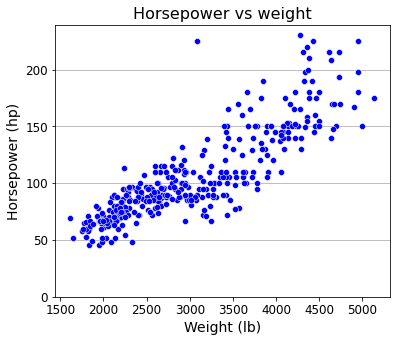

In [4]:
figure, axes = plt.subplots(figsize=(6, 5))

sns.scatterplot(x="weight", y="horsepower", data=cars_df, marker="o", color="b")

# Set title and axes labels
plt.title("Horsepower vs weight")
axes.set_ylabel("Horsepower (hp)")
axes.set_xlabel("Weight (lb)")

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

# Set lower y axis limit to 0
axes.set_ylim(bottom=0);

<a id='scatterplot_categorical'></a>

### 3.1.1  Scatter plot - Categorical data

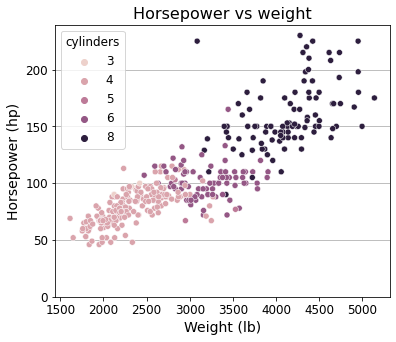

In [5]:
figure, axes = plt.subplots(figsize=(6, 5))

sns.scatterplot(
    x="weight", y="horsepower", hue="cylinders", data=cars_df, marker="o", color="b"
)

# Set title and axes labels
plt.title("Horsepower vs weight")
axes.set_ylabel("Horsepower (hp)")
axes.set_xlabel("Weight (lb)")

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

# Set lower y axis limit to 0
axes.set_ylim(bottom=0);

<a id='regression'></a>

### 3.1.2 Regression plot - lmplot() vs regplot()

Prior to showing the plots, it's worth saying that `lmplot()` and `regplot()` are the main two functions to visualise linear regression relationship. The functions are closely related, in fact, `lmplot()` combines `regplot()` and FacetGrid as stated in [Stack Exchange.](https://datascience.stackexchange.com/questions/44192/what-is-the-difference-between-regplot-and-lmplot-in-seaborn)

Sine this notebook only serves the prupose of a cheat sheet, you can read more about the two of them and their differences in this [article of the Seaborn documentation.](https://seaborn.pydata.org/tutorial/regression.html#:~:text=While%20regplot()%20always%20shows,to%20three%20additional%20categorical%20variables.)

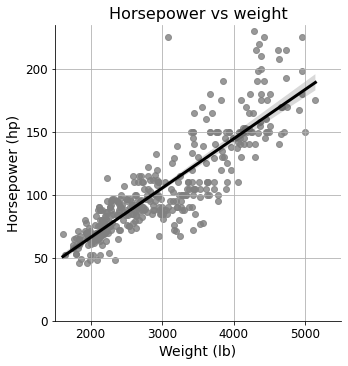

In [6]:
figure = sns.lmplot(
    x="weight",
    y="horsepower",
    data=cars_df,
    line_kws={"lw": 3, "color": "black"},
    scatter_kws={"color": "grey"},
)

# Set title and axes labels
plt.title("Horsepower vs weight")
figure.set_axis_labels("Weight (lb)", "Horsepower (hp)")

# Set Gridlines
plt.grid(visible=True, which="both", axis="both")

# Set axes limits
plt.xlim(left=1500, right=5500)
plt.ylim(bottom=0, top=235);

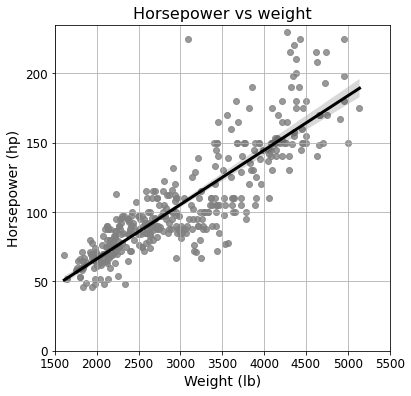

In [7]:
figure, axes = plt.subplots(figsize=(6, 6))
sns.regplot(
    x="weight",
    y="horsepower",
    data=cars_df,
    line_kws={"lw": 3, "color": "black"},
    scatter_kws={"color": "grey"},
)

# Set title and axes labels
plt.title("Horsepower vs weight")
axes.set_ylabel("Horsepower (hp)")
axes.set_xlabel("Weight (lb)")

# Set Gridlines
plt.grid(visible=True, which="both", axis="both")

# Set axes limits
plt.xlim(left=1500, right=5500)
plt.ylim(bottom=0, top=235);

<a id="bubbleplot"></a>

## 3.2 Bubble plot

Bubble plots are an extension of scatter plots that can be used to represent the relationship of 3 variables. The size of each dot corresponds with the value of one variables. You can read more about them [in the guide to bubble charts from Chartio](https://chartio.com/learn/charts/bubble-chart-complete-guide/) 

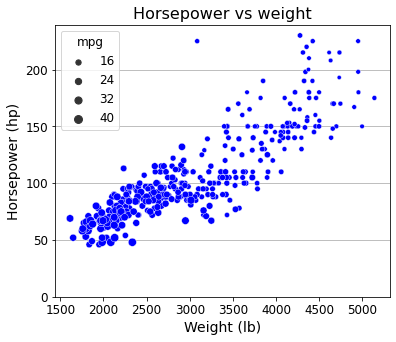

In [8]:
figure, axes = plt.subplots(figsize=(6, 5))

sns.scatterplot(x="weight", y="horsepower", data=cars_df, size=cars_df["mpg"], marker="o", color="b")

# Set title and axes labels
plt.title("Horsepower vs weight")
axes.set_ylabel("Horsepower (hp)")
axes.set_xlabel("Weight (lb)")

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

# Set lower y axis limit to 0
axes.set_ylim(bottom=0);

<a id='bubbleplot_categorical'></a>

### 3.2.1  Bubble plot - Categorical data

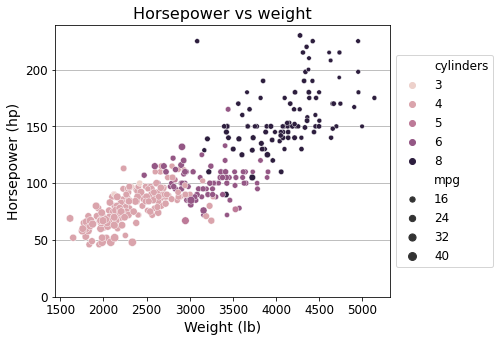

In [9]:
figure, axes = plt.subplots(figsize=(6, 5))

sns.scatterplot(x="weight", y="horsepower", data=cars_df, size=cars_df["mpg"], hue="cylinders", marker="o", color="b")

# Set title and axes labels
plt.title("Horsepower vs weight")
axes.set_ylabel("Horsepower (hp)")
axes.set_xlabel("Weight (lb)")

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

# Place legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Set lower y axis limit to 0
axes.set_ylim(bottom=0);

<a id='lineplot'></a>

## 3.2 Line plot

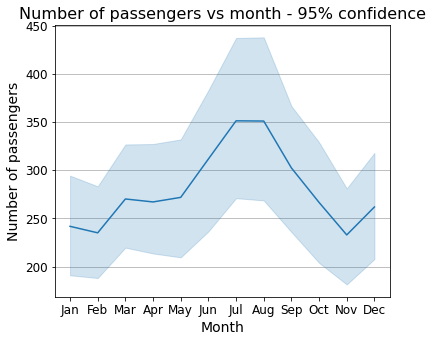

In [10]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(6, 5))

# Plot data
sns.lineplot(x="month", y="passengers", data=flights_df)

# Set title and axes labels
plt.title("Number of passengers vs month - 95% confidence")
axes.set_ylabel("Number of passengers")
axes.set_xlabel("Month")


# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

<a id='lineplot_categorical'></a>

### 3.2.1  Line plot - Categorical data

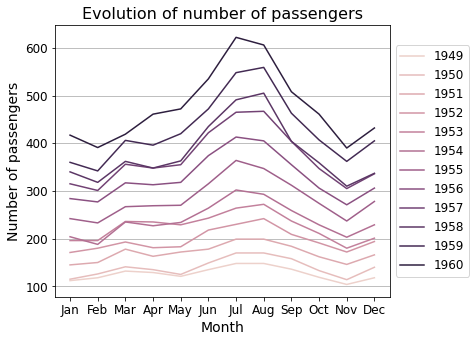

In [11]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(6, 5))

# Plot data
sns.lineplot(x="month", y="passengers", hue="year", data=flights_df, legend="full")

# Set title and axes labels
plt.title("Evolution of number of passengers")
axes.set_ylabel("Number of passengers")
axes.set_xlabel("Month")

# Change the location of the legend
axes.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

[Return to menu](#table_contents)

<a id=displot></a>
# 4. Distribution plots

We can generate the three type of distribution plots, i.e. histograms, density plots (kde) and and empirical distribution  plots (ecdf), using the function `sns.displot()`. This funtion as a wrapper of:

* `sns.histplot()`
* `sns.kdeplot()`
* `sns.ecdfplot()`

We can control the distribution function by modifying the parameter `kind`, which by default is set to `hist`.

You might have also encountered the `sns.distplot()`, which isnt' to be confused with `sns.displot()`. As [Python and R tips](https://cmdlinetips.com/2020/09/seaborn-version-0-11-0-is-here-with-displot-histplot-and-ecdfplot/) states, `sns.distplot()` is deprecated starting from Seaborn version 0.11.

<a id=histogramplot></a>
## 4.1 Histograms

This section alogside sections 4.2 (kde plots), 4.3 (ecdf plots) and 4.4 (rug plots) include two similar plots, one generated using `sns.displot()` and the relevant value of the `kind` parameter and another graph generated with the relevant function for the distribution plot - `sns.histplot()` in this section.`sns.displot()` is another function that takes advantage of FacetGrid and it draws distribution plots.

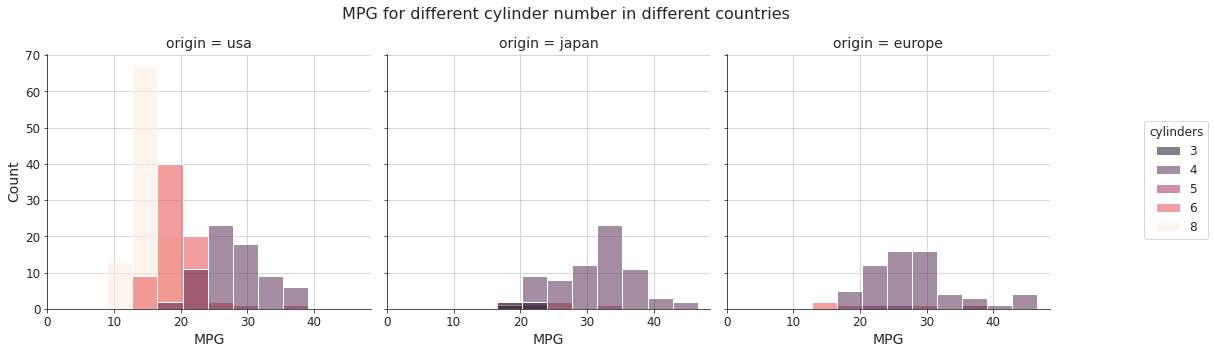

In [12]:
# Set Gridlines
sns.set_style("ticks",{'axes.grid' : True})

figure = sns.displot(
    data=cars_df,
    x="mpg",
    hue="cylinders",
    col="origin",
    bins=10,
    palette="rocket",
    legend=True,
)

# Change the location of the legend
sns.move_legend(figure, "center left", bbox_to_anchor=(1, 0.5), frameon=True)

# Set title and axes labels
figure.set_axis_labels("MPG", "Count")

# Adjust the location of the subplots and add a super title
figure.fig.subplots_adjust(top=0.85)
figure.fig.suptitle("MPG for different cylinder number in different countries", size=16)

# Set y axis lower limit to 0
figure.set(xlim=(0, None));

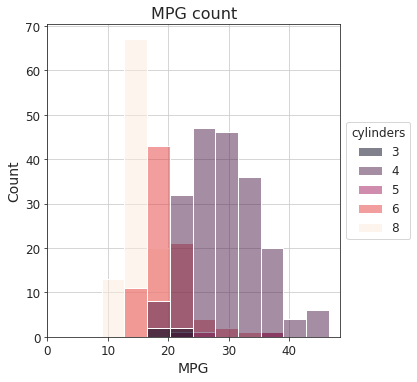

In [13]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(5.25, 5.75))

t = sns.histplot(
    data=cars_df, x="mpg", hue="cylinders", bins=10, palette="rocket", legend=True
)

# Change the location of the legend
sns.move_legend(t, "center left", bbox_to_anchor=(1, 0.5))

# Set title and axes labels
plt.title("MPG count")
axes.set_ylabel("Count")
axes.set_xlabel("MPG")

# Set y axis lower limit to 0
axes.set_xlim(left=0);

[Return to menu](#table_contents)

<a id=kdeplot></a>
## 4.2 Density plots (kde plots)
 

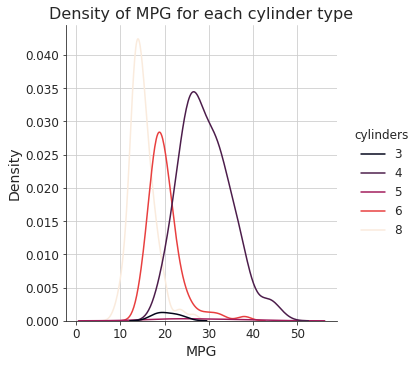

In [14]:
figure = sns.displot(
    data=cars_df, x="mpg", hue="cylinders", kind="kde", palette="rocket", legend="full"
)

# Set title and axes labels
plt.title("Density of MPG for each cylinder type")
figure.set_axis_labels("MPG", "Density");

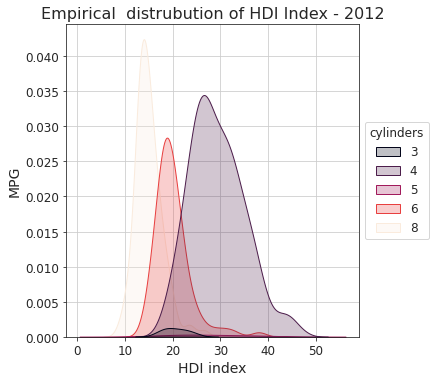

In [15]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(5.25, 5.75))

t = sns.kdeplot(data=cars_df, x="mpg", hue="cylinders", palette="rocket", shade=True)

# Set title and axes labels
plt.title("Empirical  distrubution of HDI Index - 2012")
axes.set_ylabel("MPG")
axes.set_xlabel("HDI index")

# Change location of the legend
sns.move_legend(t, loc="center left", bbox_to_anchor=(1, 0.5))

### 4.2.1 Histogram and kde plot

Histograms and kde plots can be combined using `sns.displot`

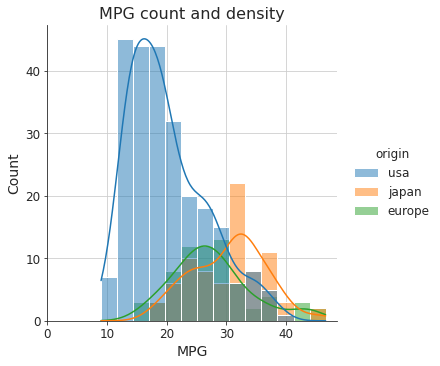

In [16]:
figure = sns.displot(data=cars_df, x="mpg", bins=14, kde=True, hue="origin")

# Set title and axes labels
plt.title("MPG count and density")
figure.set_axis_labels("MPG", "Count")

# Set y axis lower limit to 0
figure.set(xlim=(0, None));

[Return to menu](#table_contents)

<a id=ecdfplot></a>
## 4.3 Empirical distribution plots (ecdf plots)

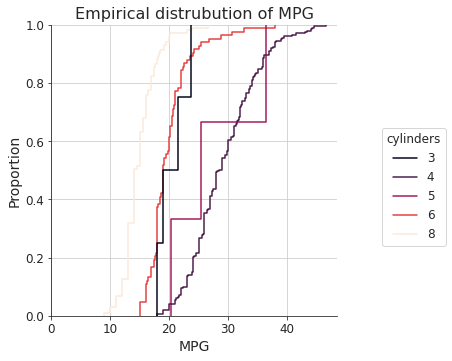

In [17]:
figure = sns.displot(
    data=cars_df, x="mpg", hue="cylinders", kind="ecdf", palette="rocket"
)

# Set title and axes labels
plt.title("Empirical distrubution of MPG")
figure.set_axis_labels("MPG", "Proportion")

# Change location and appearance of the legend
sns.move_legend(figure, loc="center left", bbox_to_anchor=(0.9, 0.5), frameon=True)

# Set y axis lower limit to 0
figure.set(xlim=(0, None));

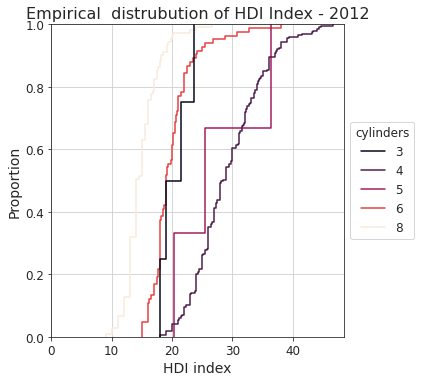

In [18]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(5.25, 5.75))

t = sns.ecdfplot(data=cars_df, x="mpg", hue="cylinders", palette="rocket")

# Set title and axes labels
plt.title("Empirical  distrubution of HDI Index - 2012")
axes.set_ylabel("Proportion")
axes.set_xlabel("HDI index")

# Change location and appearance of the legend
sns.move_legend(t, loc="center left", bbox_to_anchor=(1, 0.5), frameon=True)

# Set y axis lower limit to 0
axes.set_xlim(left=0);

[Return to menu](#table_contents)

<a id=rugplot></a>

## 4.4 Rug plots

As stated in the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.rugplot.html) Rug plots are intended to compliment other plots by showing the location of individual observations in an unobtrusive way. Therefore, they can easily be combined with other distribution plots usin `sns.displot` or `sns.rugplot`

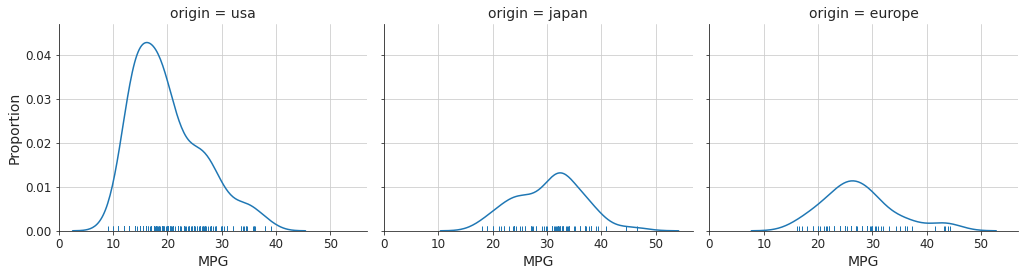

In [19]:
figure = sns.displot(
    data=cars_df, x="mpg", kind="kde", col="origin", rug=True, height=4, aspect=1.2,
)

figure.set_axis_labels("MPG", "Proportion");

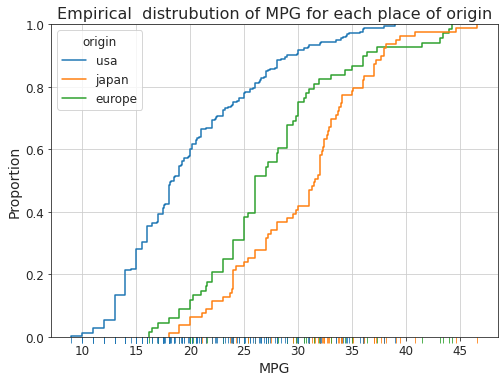

In [20]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(8, 5.75))

sns.ecdfplot(data=cars_df, x="mpg", hue="origin")
sns.rugplot(
    data=cars_df, x="mpg", hue="origin", lw=1, alpha=0.8, height=-0.02, clip_on=False
)

# Set title and axes labels
plt.title("Empirical  distrubution of MPG for each place of origin")
axes.set_xlabel("MPG");

[Return to menu](#table_contents)

<a id=2Dplot></a>

## 4.5 Bivariate distribution plots

Simarly to univariate distribution plots, bivariate distribution plots can also be created using `sns.displot` or the relevant functions such as `sns.histplot` or `sns.kdeplot`. The next sections only include one of them, but you can check the previous sections in case you want a different function.

<a id=2Dhistplot></a>
### 4.5.1 Bivariate histogram

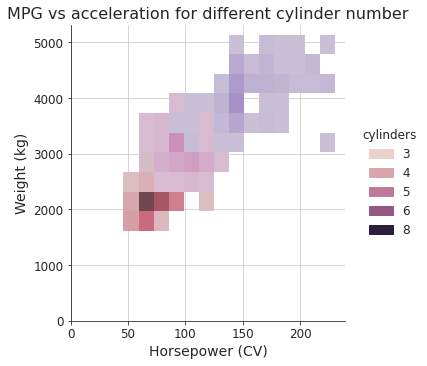

In [21]:
figure = sns.displot(data=cars_df, x="horsepower", y="weight", hue="cylinders")

# Set title and axes labelsb
plt.title("MPG vs acceleration for different cylinder number")
figure.set_axis_labels("Horsepower (CV)", "Weight (kg)")

# Set x and y lower limits to 0
figure.set(xlim=(0, None), ylim=(0, None));

<a id=2Ddensityplot></a>

### 4.5.2 Bivariate density plot

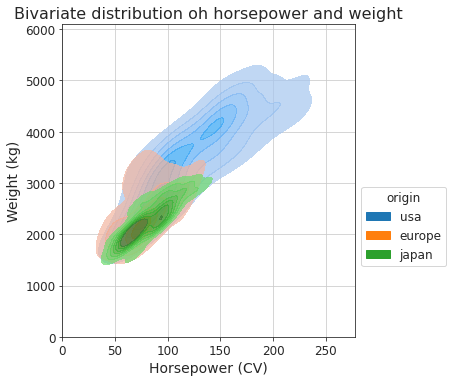

In [22]:
# Create plot and define figure and axes objects
figure, axes = plt.subplots(figsize=(5.25, 5.75))

sns.kdeplot(
    data=cars_df,
    x="horsepower",
    y="weight",
    hue="origin",
    hue_order=["usa", "europe", "japan"],
    levels=8,
    fill=True,
    alpha=0.7,
)

# Set title and axes labels
plt.title("Bivariate distribution oh horsepower and weight")
axes.set_ylabel("Weight (kg)")
axes.set_xlabel("Horsepower (CV)")


# Add a legend next to the figure
axes.legend_.set_bbox_to_anchor((1.0, 0.5))
axes.legend_._set_loc(2)

# Set x and y lower limits to 0
axes.set_xlim(0, None)
axes.set_ylim(0, None);

<a id=2Drugplot></a>

### 4.5.3 Bivariate rug plot

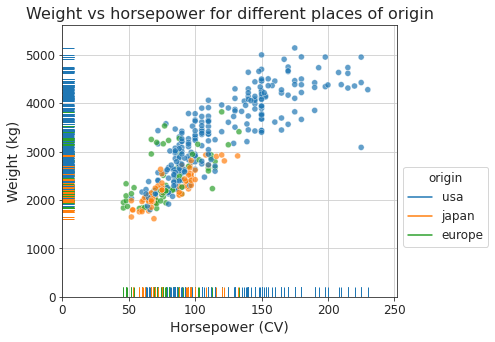

In [23]:
figure, axes = plt.subplots(figsize=(6, 5))

sns.scatterplot(
    x="horsepower", y="weight", data=cars_df, hue="origin", marker="o", alpha=0.7
)
sns.rugplot(
    x="horsepower", y="weight", data=cars_df, hue="origin", height=0.035,
)

# Set title and axes labels
plt.title("Weight vs horsepower for different places of origin")
axes.set_ylabel("Weight (kg)")
axes.set_xlabel("Horsepower (CV)")

# Add a legend
axes.legend_.set_bbox_to_anchor((1.0, 0.5))
axes.legend_._set_loc(2)

# Set x and y lower limits to 0
axes.set_xlim(0, None)
axes.set_ylim(0, None);

<a id=jointplot></a>

### 4.5.4 Joint plot

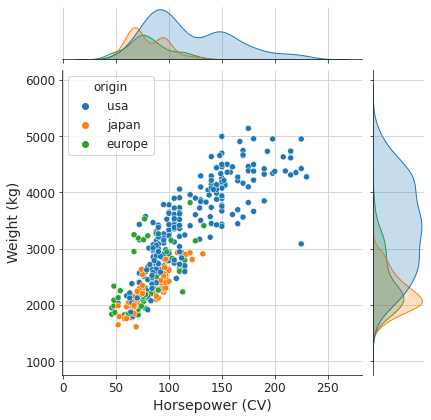

In [24]:
figure = sns.jointplot(x="horsepower", y="weight", data=cars_df, hue="origin",)

# Set axes labels
figure.set_axis_labels("Horsepower (CV)", "Weight (kg)");

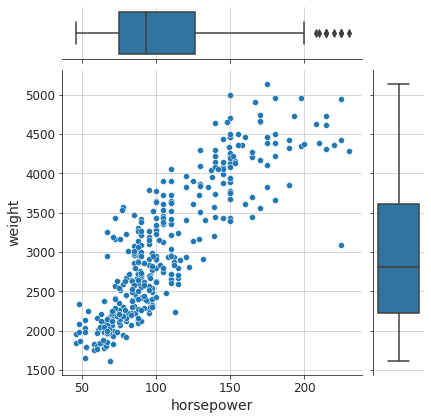

In [25]:
g = sns.JointGrid(x="horsepower", y="weight", data=cars_df)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)

[Return to menu](#table_contents)

<a id=categoricalplot></a>

# 5. Categorical plots

Similarly to distribution plots, Seaborn includes several functions to create each of the categorical plots. Once can use the particular categorical plot function, such as `sns.striplot` and `sns.boxplot`, or one can use the `sns.catplot` function. The `sns.catplot` function is, as stated [in the documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html) , a figure-level interface for drawing categorical plots onto a FacetGrid. You can plot any categorical plot by changing the value of the `kind` parameter.

<a id=stripplot></a>

## 5.1 Strip plots

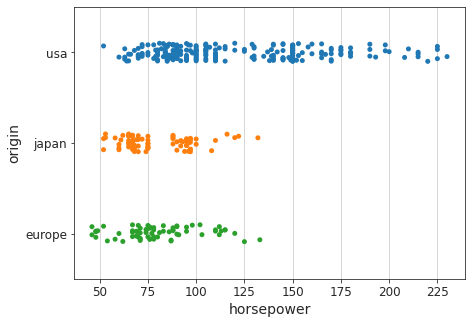

In [26]:
figure, axes = plt.subplots(figsize=(7, 5))

sns.stripplot(y="origin", x="horsepower", data=cars_df)

# Set Gridlines
axes.grid(visible=True, which="both", axis="x")
axes.set_axisbelow(True)

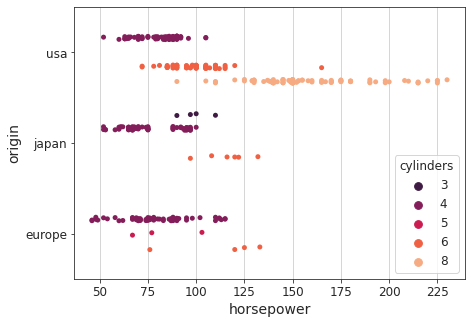

In [27]:
figure, axes = plt.subplots(figsize=(7, 5))

sns.stripplot(y="origin", x="horsepower", hue="cylinders", data=cars_df, dodge=True, palette="rocket")

# Set Gridlines
axes.grid(visible=True, which="both", axis="x")
axes.set_axisbelow(True)

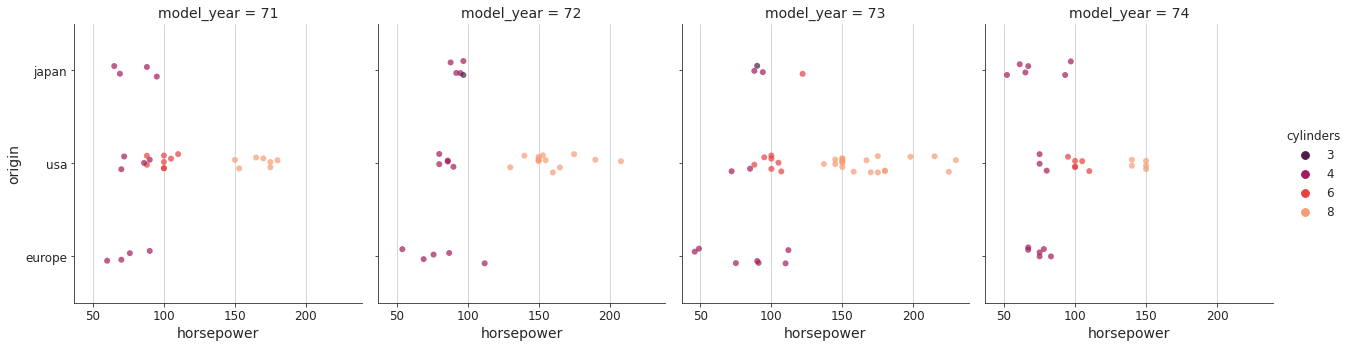

In [28]:
t = sns.catplot(
    y="origin",
    x="horsepower",
    hue="cylinders",
    data=cars_df.loc[(cars_df["model_year"] > 70) & (cars_df["model_year"] < 75), :],
    col="model_year",
    kind="strip",
    height=5,
    aspect=0.9,
    s=6,
    alpha=0.7,
    palette="rocket"
)


<a id=swarmplot></a>

## 5.2 Swarm plots

While I was familiar with the other categorical plots, I found out about swarm plots when I developed this notebook. [The documentation] states that a `sns.swarmplot` draws a categorical scatterplot with points adjusted to be non-overlapping. while this might be a good approach to understand the distribution of the data, it does not scale well to large numbers of observations.

<AxesSubplot:xlabel='horsepower', ylabel='origin'>

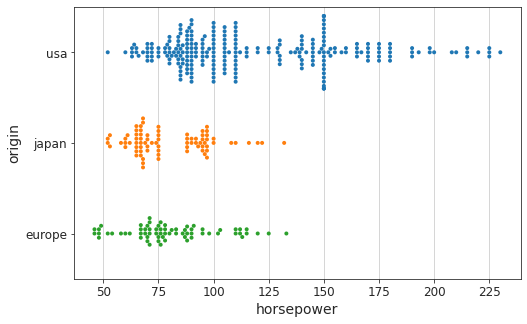

In [29]:
figure, axes = plt.subplots(figsize=(8, 5))

sns.swarmplot(y="origin", x="horsepower", data=cars_df, s=4)

# Set Gridlines
# axes.grid(visible=True, which="both", axis="x")
# axes.set_axisbelow(True)

The next figure is an example of the limitations of the swarmplot. I want to replicate the above plot, but I want to add the cylinders to the mix. As one can see, there are several warnings because the x % of the points cannot be placed in the graph. This has a simple solution, increase the size of figure or reduce the number of categories, but I wanted to show that even a dataset of aroudn 400 points might not be suitable for a swarm plot.


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; yo

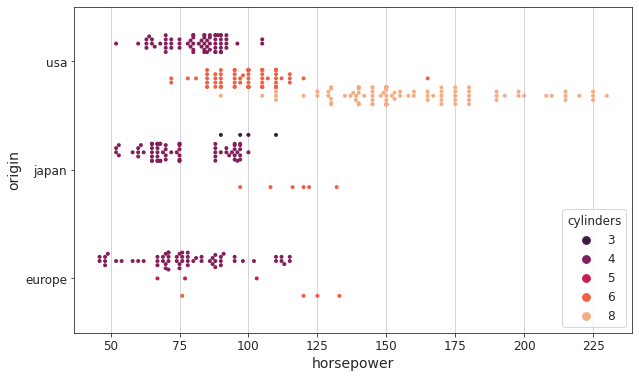

In [30]:
figure, axes = plt.subplots(figsize=(10, 6))

sns.swarmplot(y="origin", x="horsepower", hue="cylinders", data=cars_df, dodge=True, palette="rocket", s=4)

# Set Gridlines
axes.grid(visible=True, which="both", axis="x")
axes.set_axisbelow(True)

<a id=boxplot></a>

## 5.3 Box plots



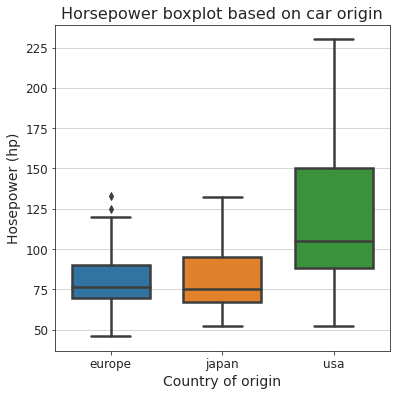

In [31]:
figure, axes = plt.subplots(figsize=(6, 6))

sns.boxplot(
    x="origin",
    y="horsepower",
    data=cars_df,
    order=["europe", "japan", "usa"],
    width=0.7,
    linewidth=2.5,
)

# Set title and axes labels
plt.title("Horsepower boxplot based on car origin")
axes.set_ylabel("Hosepower (hp)")
axes.set_xlabel("Country of origin");

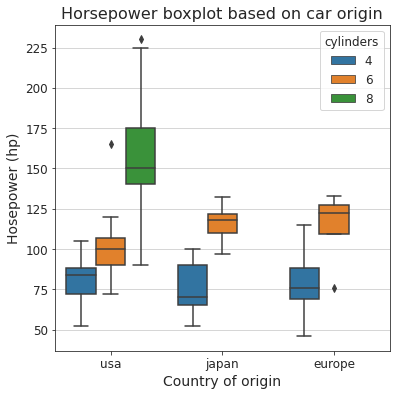

In [32]:
figure, axes = plt.subplots(figsize=(6, 6))

sns.boxplot(x="origin", y="horsepower", hue="cylinders", data=cars_df[cars_df["cylinders"].isin([4, 6, 8])])

# Set title and axes labels
plt.title("Horsepower boxplot based on car origin")
axes.set_ylabel("Hosepower (hp)")
axes.set_xlabel("Country of origin");

<a id=violinplot></a>

## 5.4 Violin plots
    


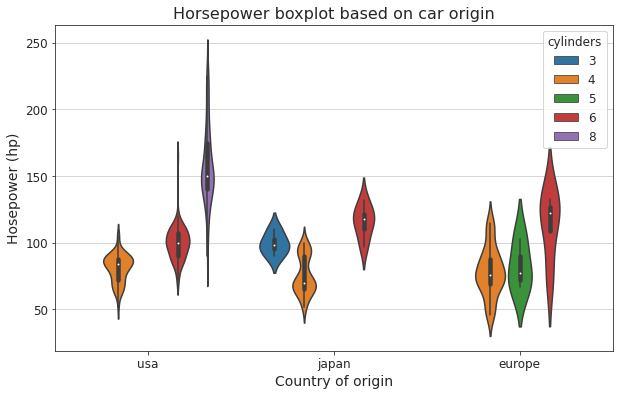

In [33]:
figure, axes = plt.subplots(figsize=(10, 6))

sns.violinplot(x="origin", y="horsepower", hue="cylinders", data=cars_df)

# Set title and axes labels
plt.title("Horsepower boxplot based on car origin")
axes.set_ylabel("Hosepower (hp)")
axes.set_xlabel("Country of origin");

<a id=pointplot></a>

## 5.5 Point plots

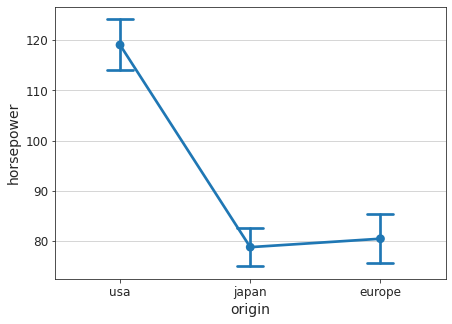

In [34]:
# Set tge gridlines to false in the seaborn style as it will display vertical
# gridlines too, which aren't required for this plot
sns.set_style("ticks",{'axes.grid' : False})

figure, axes = plt.subplots(figsize=(7, 5))

sns.pointplot(x="origin", y="horsepower", data=cars_df[cars_df["cylinders"].isin([4, 6, 8])], dodge=True, capsize=0.2)

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

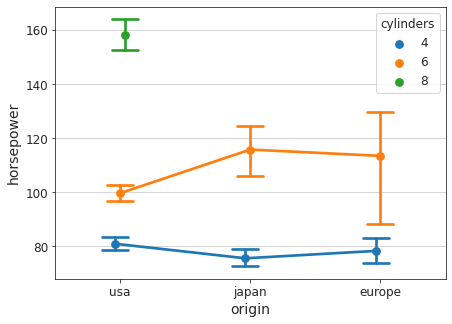

In [35]:
figure, axes = plt.subplots(figsize=(7, 5))

sns.pointplot(x="origin", y="horsepower", data=cars_df[cars_df["cylinders"].isin([4, 6, 8])], hue="cylinders", dodge=True, capsize=0.2)

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

<a id="barplot"></a>

## 5.6 Bar plots

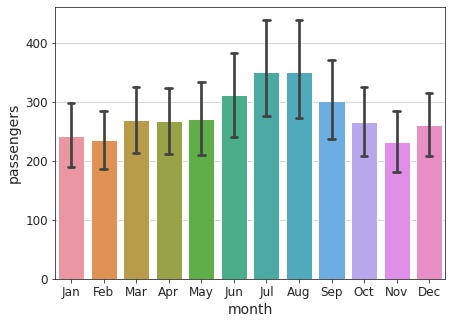

In [36]:
# Set Gridlines
sns.set_style("ticks",{'axes.grid' : False})

figure, axes = plt.subplots(figsize=(7, 5))

sns.barplot(x="month", y="passengers", data=flights_df, capsize=0.2)

# Set Gridlines
axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

[Return to menu](#table_contents)

<a id="otherplot"></a>

# 6. Other plots

This section includes two of my favourite saeborn visualisation functions, pair plots and heatmap. I often use them for Exploratory Data Analysis when I'm creating ML models. 

<a id=pairplot></a>
## 6.1 Pair plot

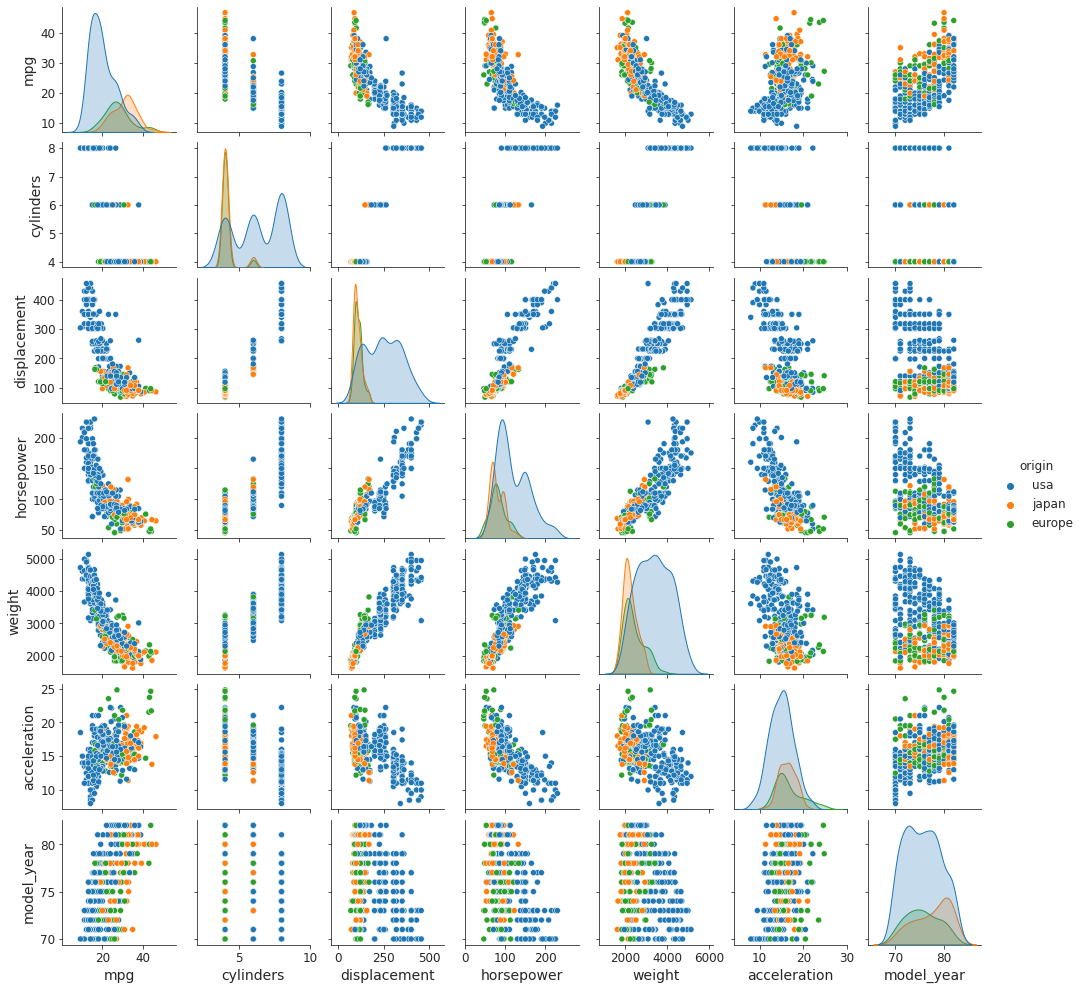

In [37]:
sns.pairplot(data=cars_df[cars_df["cylinders"].isin([4, 6, 8])], hue="origin", height=2, aspect=1);

<a id="heatmap"></a>

## 6.2 Heatmap

<AxesSubplot:>

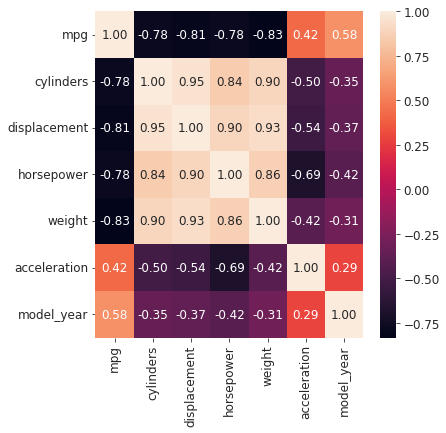

In [38]:
fig = plt.figure(figsize=(6,6))

sns.heatmap(cars_df.corr(), annot=True, fmt=".2f")

Bear in mind that the heatmap function needs the data in matrix form. If you want to represent data from your dataframe, the `pivot` function is a great way to arrange the data in the format heatmap needs: 

<AxesSubplot:xlabel='year', ylabel='month'>

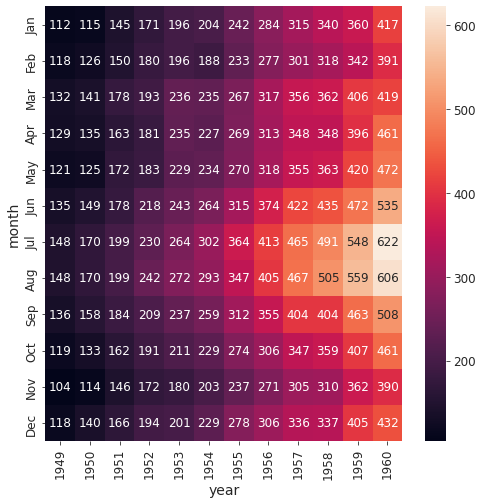

In [39]:
fig = plt.figure(figsize=(8,8))

sns.heatmap(flights_df.pivot("month", "year", "passengers"), annot=True, fmt="d")

[Return to menu](#table_contents)